# TASK-2: Unsupervised Machine Learning with Python and Scikit Learn

---

**Unsupervised learning** is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs. It forms one of the three main categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning, a related variant, makes use of supervised and unsupervised techniques.

Here, we are going to see how KMeans cluster algorithm works. For data visualization we will be using matplotlib and seaborn library and for model we will use **KMeansClustering** with the help of sklearn library.

# Stage 1: Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stage 2: Reading Dataset

In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.shape

(150, 6)

# Stage 3: Data Visualisation

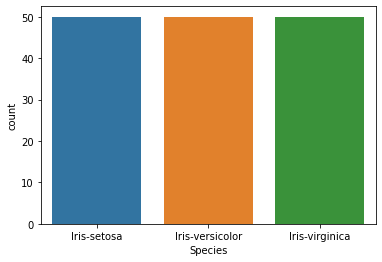

In [ ]:
ax = sns.countplot(x="Species", data=dataset)

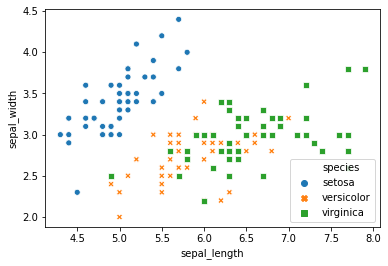

In [ ]:
iris = sns.load_dataset("iris")
ax = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width,
                     hue=iris.species, style=iris.species)


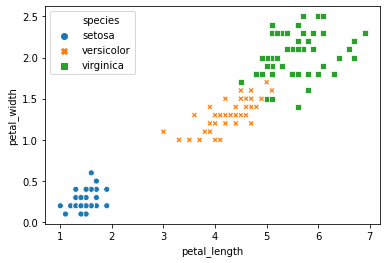

In [ ]:
iris = sns.load_dataset("iris")
ax = sns.scatterplot(x=iris.petal_length, y=iris.petal_width,
                     hue=iris.species, style=iris.species)


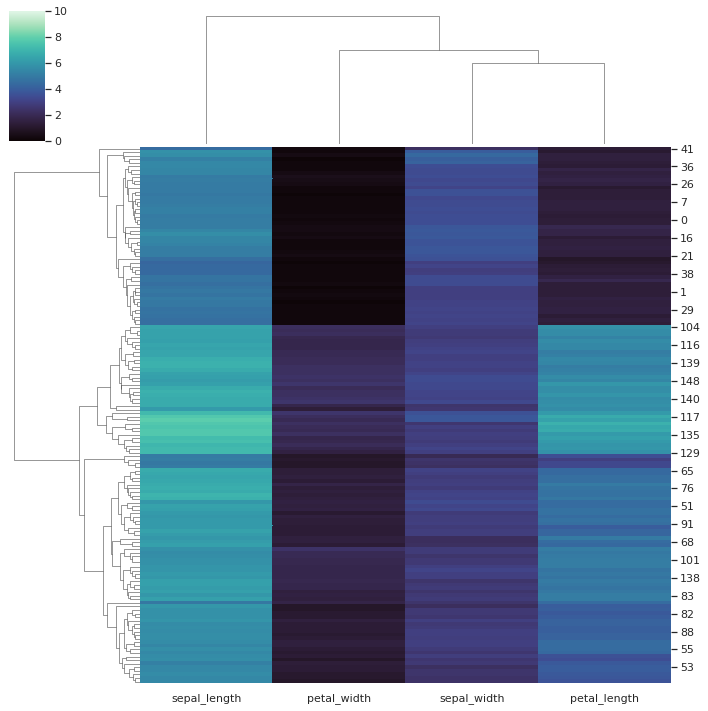

In [ ]:
sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris, cmap="mako", vmin=0, vmax=10)

# Stage 4: Data Preprocessing

In [ ]:
x = dataset.iloc[:, [1,2,3,4]].values
y = dataset.iloc[:, -1].values

# Stage 5: Building Model

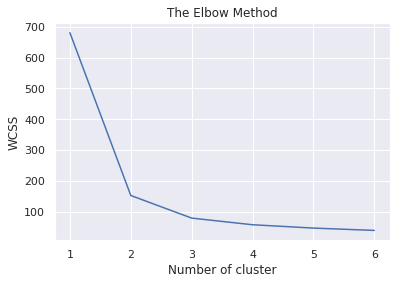

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,7):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_means = kmeans.fit_predict(x)
print(y_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Stage 6: Model Evaluation

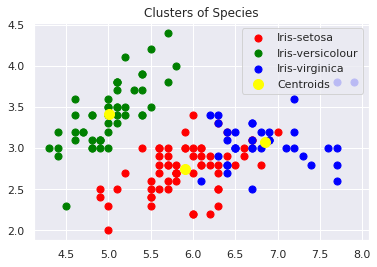

In [ ]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 50, c ='red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 50, c ='green', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 50, c ='blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = "yellow", label = 'Centroids')
plt.title('Clusters of Species')
plt.legend()
plt.show()